# Low Resolution - SRGAN

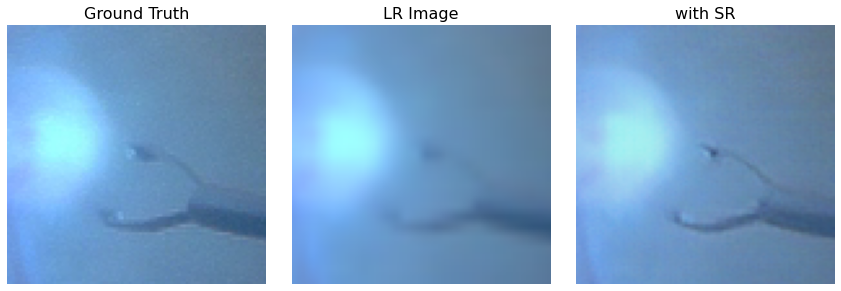

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_id = '000224'
hr_img = Image.open(f'./retinal_dataset/centered/{image_id}.png')
lr_img = Image.open(f'./retinal_dataset/centered-rescaled-1-over-4/{image_id}.png')
srgan_img = Image.open(f'./retinal_dataset/centered-srgan-1-over-4/{image_id}.png')

index = (slice(100, 200), slice(150, 250))
hr_img = np.array(hr_img)[index]
lr_img = np.array(lr_img)[index]
srgan_img = np.array(srgan_img)[index]

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.title('Ground Truth', fontsize=16)
plt.imshow(hr_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('LR Image', fontsize=16)
plt.imshow(lr_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('with SR', fontsize=16)
plt.imshow(srgan_img)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/LR-SR.png', transparent=True)

# Accuracy

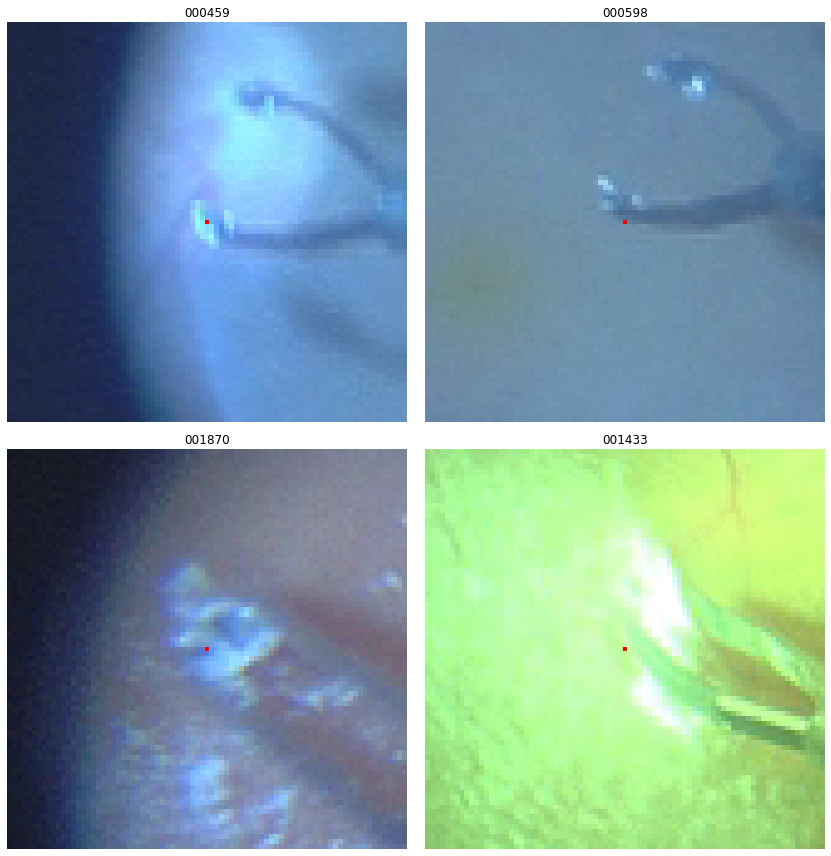

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

hr_folder = Path('./retinal_dataset/centered')
annotations = pd.read_csv(hr_folder / 'annotations.csv', dtype={'image_id': str})
annotations = annotations.set_index('image_id')

plt.figure(figsize=(12, 12))
subplot_idx = 1
for idx, row in annotations.sample(4).iterrows():
    plt.subplot(2, 2, subplot_idx)
    plt.axis('off')
    
    img = Image.open(hr_folder / f'{idx}.png')
    img = np.array(img)
    
    y = int(row['tip_2_x'])
    x = int(row['tip_2_y'])
    img[x, y] = np.array([255, 0, 0])
    
    r = 40
    plt.title(idx)
    plt.imshow(img[x-r:x+r+1, y-r:y+r+1])
    
    subplot_idx += 1
    plt.tight_layout()

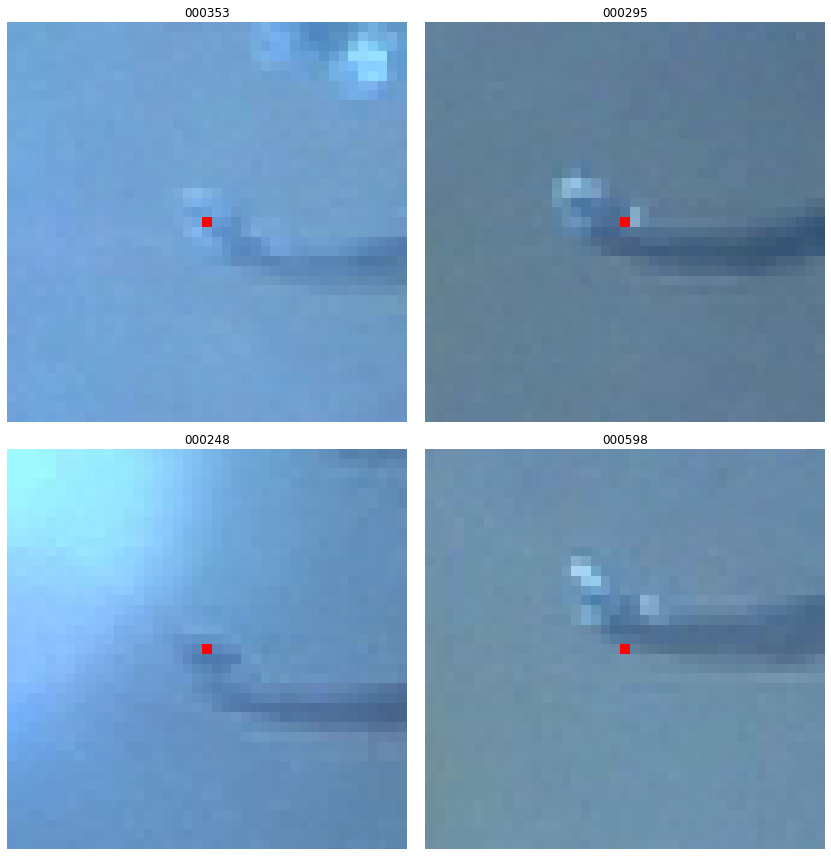

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path


plt.figure(figsize=(12, 12))
subplot_idx = 1
for idx in ['000353', '000295', '000248', '000598']:
    row = annotations.loc[idx]
    plt.subplot(2, 2, subplot_idx)
    plt.axis('off')
    
    img = Image.open(hr_folder / f'{idx}.png')
    img = np.array(img)
    
    y = int(row['tip_2_x'])
    x = int(row['tip_2_y'])
    img[x, y] = np.array([255, 0, 0])
    
    r = 20
    plt.title(idx)
    plt.imshow(img[x-r:x+r+1, y-r:y+r+1])
    
    subplot_idx += 1
    plt.tight_layout()
    
plt.savefig('figures/annotation-precision.png', transparent=True)

# Original Image with Annotation

(640, 480)


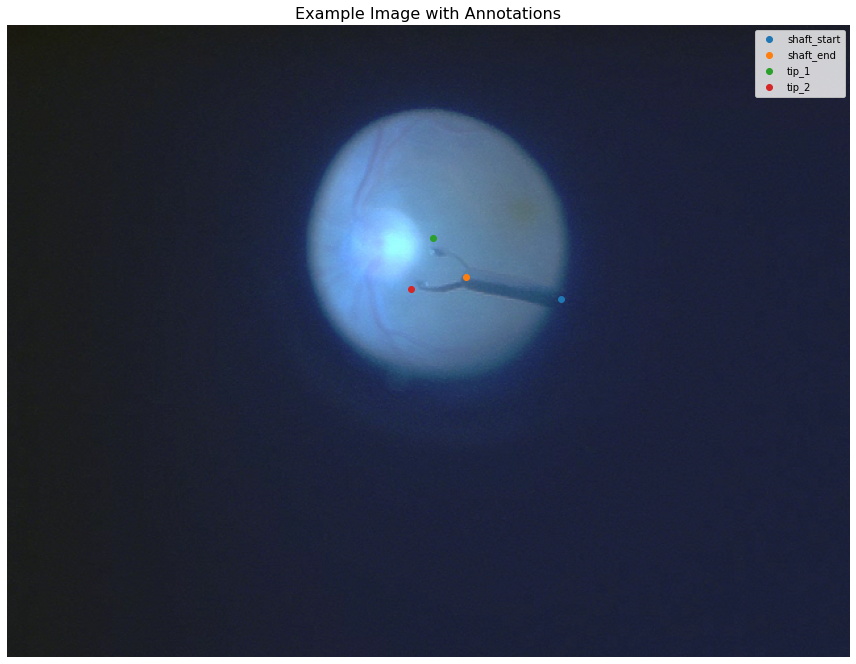

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

original_images = 'retinal_dataset/retinal_dataset'

seqs = glob('retinal_dataset/retinal_dataset/seq*.txt')

df = None
for seq in seqs:
    with open(seq, 'r') as fp:
        data = [line.strip().split(' ') for line in fp.readlines()]
        
    temp = pd.DataFrame(data=data, columns=[
        'image_id', 
        'shaft_start_y', 
        'shaft_start_x', 
        'shaft_end_y', 
        'shaft_end_x',  
        'tip_1_y', 
        'tip_1_x',
        'tip_2_y', 
        'tip_2_x'
    ])
    temp = temp.set_index('image_id')
    
    if df is None:
        df = temp
    else:
        df = pd.concat([df, temp])
        
df = df.astype(float)

image_id = '000224'
img = Image.open(original_images + '/' + image_id + '.png')
plt.figure(figsize=(12,10))

parts = ['shaft_start', 'shaft_end', 'tip_1', 'tip_2']

row = df.loc[image_id]

for part in parts:
    x = int(row[part + '_x'])
    y = int(row[part + '_y'])
    plt.scatter(x, y, label=part)
    
plt.imshow(img)
plt.legend()
print(img.size)
plt.axis('off')
plt.title('Example Image with Annotations', fontsize=16)
plt.tight_layout()
plt.savefig('figures/example-original.png')


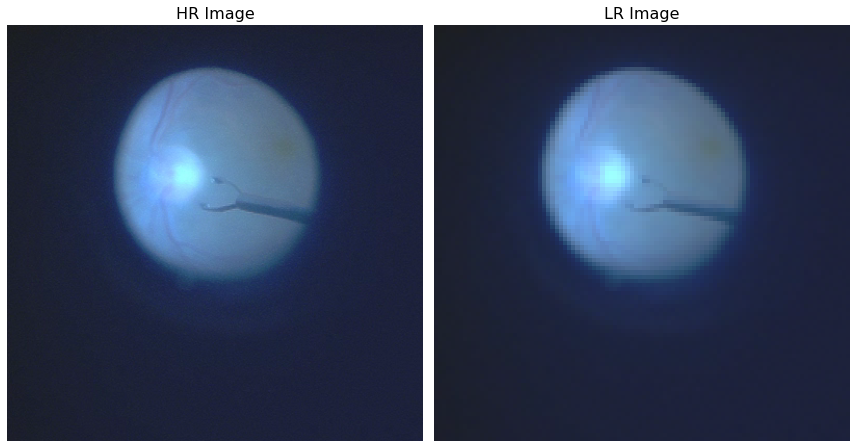

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

hr_folder = Path('./retinal_dataset/centered')
lr_folder = Path('./retinal_dataset/centered_scale-1-over-4')
annotations = pd.read_csv(hr_folder / 'annotations.csv', dtype={'image_id': str})
annotations = annotations.set_index('image_id')

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
idx = '000224'
plt.axis('off')

img = Image.open(hr_folder / f'{idx}.png')
img = np.array(img)

# y = int(row['tip_2_x'])
# x = int(row['tip_2_y'])
# img[x, y] = np.array([255, 0, 0])

plt.title('HR Image', fontsize=16)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('LR Image', fontsize=16)
img = Image.open(lr_folder / f'{idx}.png')
img = np.array(img)
plt.imshow(img)
plt.axis('off')
# subplot_idx += 1
plt.tight_layout()

# 